In [28]:
import pyAgrum.lib.notebook as gnb
import pyAgrum as gum
import otagrum as otagr
import openturns as ot
import os
import os.path as path
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
sys.path.append('..')
import hill_climbing as hc
import score as sc
import utils as ut

import matplotlib as mpl
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif')
from matplotlib.ticker import MaxNLocator

In [4]:
generator = gum.BNGenerator()

In [9]:
gum.initRandom()

n_nodes=[]
times_cpc=[]
times_elidan=[]
for i in range(2, 21):
    print("Number of node :", i, flush=True)
    
    n_nodes.append(i)
    n_arc = int(1.2*(i-1) )
    bn = generator.generate(i, n_arc)
    TNdag = otagr.NamedDAG(bn.dag(), bn.names())
    
    data = ut.generate_gaussian_data(TNdag, 30000, 0.8)
    
    learner = otagr.ContinuousPC(data, 5, 0.05)
    start = time.time()
    LNdagCPC = learner.learnDAG()
    end = time.time()
    
    LNdagCPC = [[ut.named_dag_to_bn(LNdagCPC)]]
    times_cpc.append(end-start)
    
    cpc_scores = ut.structural_scores(ut.named_dag_to_bn(TNdag), LNdagCPC)
    gnb.sideBySide(ut.named_dag_to_bn(TNdag), LNdagCPC[0][0], captions=['True', 'Learned'])
    
    start = time.time()
    LNdagElidan = hc.hill_climbing(data, 4, 2)[1]
    end = time.time()
    
    LNdagElidan = [[ut.dag_to_bn(LNdagElidan, data.getDescription())]]
    times_elidan.append(end - start)
    
    elidan_scores = ut.structural_scores(ut.named_dag_to_bn(TNdag), LNdagElidan)
    gnb.sideBySide(ut.named_dag_to_bn(TNdag), LNdagElidan[0][0], captions=['True', 'Learned'])
    
    print("CPC scores: ", cpc_scores)
    print("Elidan scores: ", elidan_scores)
    print("\n")

Number of node : 2


G <!-- n_0 --> n_0 n_0 <!-- n_1 --> n_1 n_1 <!-- n_1->n_0 --> n_1->n_0,G <!-- n_0 --> n_0 n_0 <!-- n_1 --> n_1 n_1 <!-- n_0->n_1 --> n_0->n_1
True,Learned


G <!-- n_0 --> n_0 n_0 <!-- n_1 --> n_1 n_1 <!-- n_1->n_0 --> n_1->n_0,G <!-- n_0 --> n_0 n_0 <!-- n_1 --> n_1 n_1 <!-- n_0->n_1 --> n_0->n_1
True,Learned


CPC scores:  ([[0.0]], [[0.0]], [[0.0]])
Elidan scores:  ([[0.0]], [[0.0]], [[0.0]])


Number of node : 3


G <!-- n_0 --> n_0 n_0 <!-- n_1 --> n_1 n_1 <!-- n_2 --> n_2 n_2 <!-- n_2->n_0 --> n_2->n_0 <!-- n_2->n_1 --> n_2->n_1,G <!-- n_0 --> n_0 n_0 <!-- n_1 --> n_1 n_1 <!-- n_0->n_1 --> n_0->n_1 <!-- n_2 --> n_2 n_2 <!-- n_0->n_2 --> n_0->n_2 <!-- n_2->n_1 --> n_2->n_1
True,Learned


G <!-- n_0 --> n_0 n_0 <!-- n_1 --> n_1 n_1 <!-- n_2 --> n_2 n_2 <!-- n_2->n_0 --> n_2->n_0 <!-- n_2->n_1 --> n_2->n_1,G <!-- n_0 --> n_0 n_0 <!-- n_2 --> n_2 n_2 <!-- n_0->n_2 --> n_0->n_2 <!-- n_1 --> n_1 n_1 <!-- n_2->n_1 --> n_2->n_1
True,Learned


CPC scores:  ([[0.3333333333333333]], [[0.5]], [[0.4]])
Elidan scores:  ([[0.5]], [[0.5]], [[0.5]])


Number of node : 4


KeyboardInterrupt: 

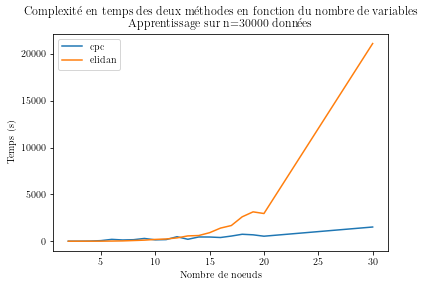

In [36]:
plt.plot(n_nodes, times_cpc, label='cpc')
plt.plot(n_nodes, times_elidan, label='elidan')
plt.legend()
plt.xlabel("Nombre de noeuds")
plt.ylabel("Temps (s)")
plt.title("Complexité en temps des deux méthodes en fonction du nombre de variables\n Apprentissage sur n=30000 données")
plt.savefig("complexite_temps_noeuds.pdf", transparency=True)
plt.show()

In [26]:
len(n_nodes)

21

In [ ]:
ut.generate_data()

In [27]:
n_nodes = n_nodes[0:20]

In [ ]:
for i in range(30, 71, 10):
    print("Number of node :", i, flush=True)
    
    n_nodes.append(i)
    n_arc = int(1.2*(i-1) )
    bn = generator.generate(i, n_arc)
    TNdag = otagr.NamedDAG(bn.dag(), bn.names())
    
    data = ut.generate_gaussian_data(TNdag, 30000, 0.8)
    
    learner = otagr.ContinuousPC(data, 5, 0.05)
    start = time.time()
    LNdagCPC = learner.learnDAG()
    end = time.time()
    
    LNdagCPC = [[ut.named_dag_to_bn(LNdagCPC)]]
    times_cpc.append(end-start)
    
    cpc_scores = ut.structural_scores(ut.named_dag_to_bn(TNdag), LNdagCPC)
    gnb.sideBySide(ut.named_dag_to_bn(TNdag), LNdagCPC[0][0], captions=['True', 'Learned'])
    
    start = time.time()
    LNdagElidan = hc.hill_climbing(data, 4, 2)[1]
    end = time.time()
    
    LNdagElidan = [[ut.dag_to_bn(LNdagElidan, data.getDescription())]]
    times_elidan.append(end - start)
    
    elidan_scores = ut.structural_scores(ut.named_dag_to_bn(TNdag), LNdagElidan)
    gnb.sideBySide(ut.named_dag_to_bn(TNdag), LNdagElidan[0][0], captions=['True', 'Learned'])
    
    print("CPC scores: ", cpc_scores)
    print("Elidan scores: ", elidan_scores)
    print("\n")

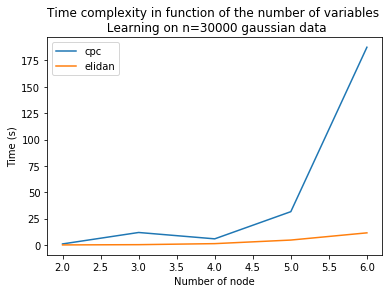

In [10]:
plt.plot(n_nodes, times_cpc, label='cpc')
plt.plot(n_nodes, times_elidan, label='elidan')
plt.legend()
plt.xlabel("Number of node")
plt.ylabel("Time (s)")
plt.title("Time complexity in function of the number of variables \n Learning on n=30000 gaussian data")
plt.show()

In [4]:
generator = gum.BNGenerator()
n_arc = int(1.2*(5-1) )
bn = generator.generate(5, n_arc)
TNdag = otagr.NamedDAG(bn.dag(), bn.names())

In [5]:
order = TNdag.getTopologicalOrder()

In [6]:
order.getSize()

5

In [ ]:
n_nodes = np.linspace(start_size, end_size, n_samples, dtype=int)

times_cpc=[]
times_elidan=[]
for i in n_nodes:
    print(i)
    n_arc = int( density * (i-1) )
    print(n_arc)
    bn = generator.generate(i, n_arc)
    TNdag = otagr.NamedDAG(bn.dag(), bn.names())
    
    data = ut.generate_data(TNdag, sample_size, distribution, 0.8)
    
    learner = otagr.ContinuousPC(data, 5, 0.05)
    start = time.time()
    LNdagCPC = learner.learnDAG()
    end = time.time()
    times_cpc.append(end-start)
    
    start = time.time()
    LNdagElidan = hc.hill_climbing(data, 4, 2)[1]
    end = time.time()
    times_elidan.append(end - start)
    
    LNdagCPC = [[ut.named_dag_to_bn(LNdagCPC)]]
    LNdagElidan = [[ut.dag_to_bn(LNdagElidan, data.getDescription())]]
    
    #cpc_scores = ut.structural_scores(ut.named_dag_to_bn(TNdag), LNdagCPC)
    #elidan_scores = ut.structural_scores(ut.named_dag_to_bn(TNdag), LNdagElidan)

# Sample Size

In [11]:
sample_size=[]
times_cpc=[]
times_elidan=[]

data = ot.Sample.ImportFromTextFile("../../data/samples/gaussian/asia/r08/asia_gaussian_sample_01.csv", ',')
for size in range(100, 30000, 3000):
    print("Sample size :", size, flush=True)
    
    sample_size.append(size)
    sample = data[:size]   
    
    #print("Learning with CPC")
    learner = otagr.ContinuousPC(sample, 5, 0.05)
    start = time.time()
    LNdagCPC = learner.learnDAG()
    end = time.time()
    times_cpc.append(end-start)
    
    #print("Learning with Elidan")
    start = time.time()
    LNdagElidan = hc.hill_climbing(sample, 4, 2)[1]
    end = time.time()
    times_elidan.append(end - start)

Sample size : 100
Sample size : 3100
Sample size : 6100
Sample size : 9100
Sample size : 12100
Sample size : 15100
Sample size : 18100
Sample size : 21100
Sample size : 24100
Sample size : 27100


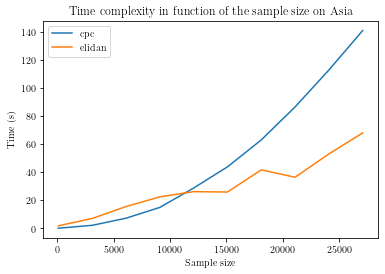

In [12]:
plt.plot(sample_size, times_cpc, label='cpc')
plt.plot(sample_size, times_elidan, label='elidan')
plt.legend()
plt.xlabel("Sample size")
plt.ylabel("Time (s)")
plt.title("Time complexity in function of the sample size on Asia")
plt.show()

# Multi

In [5]:
gum.initRandom()
list_data = []
n_nodes = []
for i in range(2, 18, 3):
    print("Number of node :", i, flush=True)
    
    n_nodes.append(i)
    n_arc = int(1.2*(i-1))
    bn = generator.generate(i, n_arc)
    TNdag = otagr.NamedDAG(bn.dag(), bn.names())
    
    data = ut.generate_gaussian_data(TNdag, 30000, 0.8)
    list_data.append(data)

Number of node : 2
Number of node : 5
Number of node : 8
Number of node : 11
Number of node : 14
Number of node : 17


In [6]:
list_size = np.linspace(100, 10000, 8, dtype=int)

In [8]:
list_times_cpc = []
for data in list_data:
    print("Data set dimension: ", data.getDimension())
    times_cpc = []
    for size in list_size:
        print("Sample size :", size, flush=True)
        
        learner = otagr.ContinuousPC(data[:size], 5, 0.05)
        start = time.time()
        LNdagCPC = learner.learnDAG()
        end = time.time()
    
        times_cpc.append(end - start)
        
    list_times_cpc.append(times_cpc)

Data set dimension:  2
Sample size : 100
Sample size : 1514
Sample size : 2928
Sample size : 4342
Sample size : 5757
Sample size : 7171
Sample size : 8585
Sample size : 10000
Data set dimension:  5
Sample size : 100
Sample size : 1514
Sample size : 2928
Sample size : 4342
Sample size : 5757
Sample size : 7171
Sample size : 8585
Sample size : 10000
Data set dimension:  8
Sample size : 100
Sample size : 1514
Sample size : 2928
Sample size : 4342
Sample size : 5757
Sample size : 7171
Sample size : 8585
Sample size : 10000
Data set dimension:  11
Sample size : 100
Sample size : 1514
Sample size : 2928
Sample size : 4342
Sample size : 5757
Sample size : 7171
Sample size : 8585
Sample size : 10000
Data set dimension:  14
Sample size : 100
Sample size : 1514
Sample size : 2928
Sample size : 4342
Sample size : 5757
Sample size : 7171
Sample size : 8585
Sample size : 10000
Data set dimension:  17
Sample size : 100
Sample size : 1514
Sample size : 2928
Sample size : 4342
Sample size : 5757
Sampl

In [9]:
lw = 2.25
label_fs = 16
tick_fs = 14
legend_fs = 16
small_legend_fs = 14

In [19]:
array_cpc = np.array(list_times_cpc)

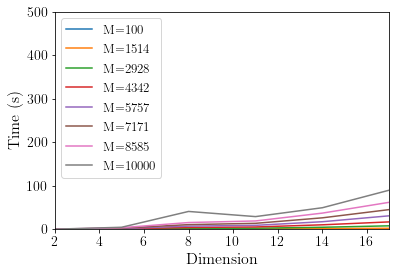

In [29]:
#fig, ax = plt.subplots()

#ax.set_xlabel('Size', fontsize=label_fs)
#ax.set_ylabel('Time (s)', fontsize=label_fs)

#ax.tick_params(labelsize=tick_fs)

#ax.set_xlim([list_size[0], list_size[-1]])
#ax.set_ylim(0,12)

#for (n,l) in zip(n_nodes, list_times_cpc):
#    lab = 'n=' + str(n)
#    ax.plot(list_size, l, label=lab)

#ax.legend(loc='best', fontsize=small_legend_fs)
#plt.savefig('time_cpc.pdf', transparent=True)
#plt.show()




fig, ax = plt.subplots()

ax.set_xlabel('Dimension', fontsize=label_fs)
ax.set_ylabel('Time (s)', fontsize=label_fs)

ax.tick_params(labelsize=tick_fs)

ax.set_xlim([dimension[0], dimension[-1]])
ax.set_ylim(0,500)

for (n,l) in zip(list_size, array_cpc.transpose()):
    lab = 'M=' + str(n)
    ax.plot(dimension, l, label=lab)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend(loc='upper left', fontsize=13)
plt.savefig('time_cpc_transpose.pdf', transparent=True)
plt.show()

In [13]:
list_times_elidan = []
for data in list_data:
    print("Data set dimension: ", data.getDimension())
    times_elidan = []
    for size in list_size:
        print("Sample size :", size, flush=True)
        
        start = time.time()
        LNdagElidan = hc.hill_climbing(data, 4, 1)[1]
        end = time.time()
    
        times_elidan.append(end - start)
        
    list_times_elidan.append(times_elidan)

Data set dimension:  2
Sample size : 100
Sample size : 1514
Sample size : 2928
Sample size : 4342
Sample size : 5757
Sample size : 7171
Sample size : 8585
Sample size : 10000
Data set dimension:  5
Sample size : 100
Sample size : 1514
Sample size : 2928
Sample size : 4342
Sample size : 5757
Sample size : 7171
Sample size : 8585
Sample size : 10000
Data set dimension:  8
Sample size : 100
Sample size : 1514
Sample size : 2928
Sample size : 4342
Sample size : 5757
Sample size : 7171
Sample size : 8585
Sample size : 10000
Data set dimension:  11
Sample size : 100
Sample size : 1514
Sample size : 2928
Sample size : 4342
Sample size : 5757
Sample size : 7171
Sample size : 8585
Sample size : 10000
Data set dimension:  14
Sample size : 100
Sample size : 1514
Sample size : 2928
Sample size : 4342
Sample size : 5757
Sample size : 7171
Sample size : 8585
Sample size : 10000
Data set dimension:  17
Sample size : 100
Sample size : 1514
Sample size : 2928
Sample size : 4342
Sample size : 5757
Sampl

In [16]:
array_elidan = np.array(list_times_elidan)
dimension = [d.getDimension() for d in list_data]

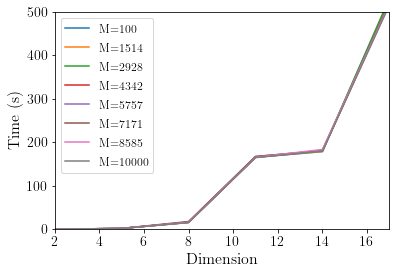

In [30]:
#fig, ax = plt.subplots()

#ax.set_xlabel('Size', fontsize=label_fs)
#ax.set_ylabel('Time (s)', fontsize=label_fs)

#ax.tick_params(labelsize=tick_fs)

#ax.set_xlim([list_size[0], list_size[-1]])
#ax.set_ylim(0,12)

#for (n,l) in zip(n_nodes, list_times_elidan):
#    lab = 'n=' + str(n)
#    ax.plot(list_size, l, label=lab)

#ax.legend(loc='best', fontsize=small_legend_fs)
#plt.savefig('time_elidan.pdf', transparent=True)
#plt.show()



fig, ax = plt.subplots()

ax.set_xlabel('Dimension', fontsize=label_fs)
ax.set_ylabel('Time (s)', fontsize=label_fs)

ax.tick_params(labelsize=tick_fs)

ax.set_xlim([dimension[0], dimension[-1]])
ax.set_ylim(0,500)

for (n,l) in zip(list_size, array_elidan.transpose()):
    lab = 'M=' + str(n)
    ax.plot(dimension, l, label=lab)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend(loc='best', fontsize=12)
plt.savefig('time_elidan_transpose.pdf', transparent=True)
plt.show()

In [28]:
n_nodes=[]
times_cpc=[]
#times_elidan=[]
for i in range(2, 23, 5):
    print("Number of node :", i, flush=True)
    
    n_nodes.append(i)
    n_arc = int(1.2*(i-1))
    bn = generator.generate(i, n_arc)
    TNdag = otagr.NamedDAG(bn.dag(), bn.names())
    
    data = ut.generate_gaussian_data(TNdag, 30000, 0.8)
    
    list_times_cpc = []
    #list_times_elidan = []
    for size in range(100, 30000, 3000):
        print("Sample size :", size, flush=True)
        learner = otagr.ContinuousPC(data[:size], 5, 0.05)
        start = time.time()
        LNdagCPC = learner.learnDAG()
        end = time.time()
    
        #start = time.time()
        #LNdagElidan = hc.hill_climbing(data, 4, 2)[1]
        #end = time.time()
    
        #times_elidan.append(end - start)
        
        list_times_cpc.append(end-start)
        #list_times_elidan.append(times_elidan)
        
    times_cpc.append(list_times_cpc)
    #times_elidan.append(list_times_elidan)

Number of node : 2
Sample size : 100
Sample size : 3100
Sample size : 6100
Sample size : 9100
Sample size : 12100
Sample size : 15100
Sample size : 18100
Sample size : 21100
Sample size : 24100
Sample size : 27100
Number of node : 7
Sample size : 100
Sample size : 3100
Sample size : 6100
Sample size : 9100
Sample size : 12100
Sample size : 15100
Sample size : 18100
Sample size : 21100
Sample size : 24100
Sample size : 27100
Number of node : 12
Sample size : 100
Sample size : 3100
Sample size : 6100
Sample size : 9100
Sample size : 12100
Sample size : 15100
Sample size : 18100
Sample size : 21100
Sample size : 24100
Sample size : 27100
Number of node : 17
Sample size : 100
Sample size : 3100
Sample size : 6100
Sample size : 9100
Sample size : 12100
Sample size : 15100
Sample size : 18100
Sample size : 21100
Sample size : 24100
Sample size : 27100
Number of node : 22
Sample size : 100
Sample size : 3100
Sample size : 6100
Sample size : 9100
Sample size : 12100
Sample size : 15100
Sample 

In [ ]:
for l in list_times_elidan:
    plt.plot(list_size, l)